# Bệnh đái tháo đường ở nữ giới Pima Indian

## 1. Giới thiệu

### Mô tả vấn đề
Bệnh tiểu đường là một trong những bệnh mạn tính phổ biến và nguy hiểm, đặc biệt trong nhóm người có yếu tố nguy cơ như béo phì, tuổi cao, hoặc có tiền sử gia đình.  
Bộ dữ liệu **Pima Indians Diabetes** được thu thập từ phụ nữ Pima (Arizona, Mỹ) ≥ 21 tuổi, nhằm mục tiêu phân tích các yếu tố sức khỏe liên quan đến khả năng mắc bệnh tiểu đường.  

### Mục tiêu phân tích
- Khám phá đặc điểm dữ liệu và kiểm tra chất lượng dữ liệu (missing values, ngoại lai).
- Phân tích mối quan hệ giữa các chỉ số sức khỏe (Glucose, BMI, Age, …) và biến mục tiêu `Outcome`.
- Xác định những biến quan trọng có thể hữu ích cho việc xây dựng mô hình dự đoán.  

### Thông tin cơ bản về dữ liệu
- **Số mẫu**: 768  
- **Số thuộc tính**: 8 đặc trưng + 1 biến mục tiêu  
- **Biến mục tiêu**: `Outcome` (0 = không tiểu đường, 1 = có tiểu đường)  

### Các bước tiếp theo 
1. Import thư viện & nạp dữ liệu
2. Khám phá cấu trúc dữ liệu
3. Phân tích đơn biến
4. Phân tích đa biến
5. Kiểm tra tương quan
6. Tóm tắt insights

## 2. Import thư viện và nạp dữ liệu

### 2.1 Khai báo thư viện (Load Libraries)

- **pandas**: dùng để xử lý dữ liệu dạng bảng (DataFrame), hỗ trợ đọc, ghi, và thao tác dữ liệu.
- **numpy**: thư viện tính toán số học, hỗ trợ mảng đa chiều và các phép toán nhanh chóng.
- **scikit-learn (SimpleImputer)**: cung cấp công cụ để xử lý giá trị thiếu (missing values), ở đây dùng `SimpleImputer`.
- **seaborn**: thư viện trực quan hóa dữ liệu, giúp vẽ các biểu đồ đẹp và dễ nhìn hơn.
- **matplotlib.pyplot**: thư viện cơ bản để vẽ biểu đồ trong Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Nạp dữ liệu (Load Dataset)

- Thực hiện việc **nạp dữ liệu gốc** từ file `pima-indians-diabetes.csv` vào Python bằng thư viện `pandas`.  
- Do file CSV không chứa tiêu đề cột (header), ta cần **gán tên cột** dựa trên mô tả trong tài liệu nghiên cứu gốc.  
- Kết quả: dữ liệu được lưu vào một **DataFrame** có cấu trúc rõ ràng.

In [2]:
# Đọc dữ liệu từ file CSV
data_path = 'pima-indians-diabetes.csv'  # Đường dẫn tới file dữ liệu

# Gán tên cột dựa trên mô tả trong tài liệu
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'] # Tên các cột

# Đọc dữ liệu từ file CSV
data = pd.read_csv(data_path, header=None, names=column_names)

### 2.3. Khám phá cấu trúc dữ liệu

- Sử dụng các hàm cơ bản của pd đễ hỗ trợ cho chúng ta có một cái nhìn tổng quát về số liệu của file 

In [3]:
data.shape

(768, 9)

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Hiển thị 5 dòng đầu để kiểm tra
print("5 dòng đầu của dữ liệu:")
print(data.head())

5 dòng đầu của dữ liệu:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
print("5 dòng cuối của dữ liệu:")
print(data.tail())

5 dòng cuối của dữ liệu:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


In [ ]:
# Hiển thị thông tin cơ bản về dữ liệu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


**Nhận xét cấu trúc dữ liệu:**
   - Tổng cộng **767 dòng × 9 cột**.  
   - Tất cả các biến đều dạng số (`int` hoặc `float`). 

In [9]:
# Thống kê mô tả
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

- Các thống kê mô tả chính và ý nghĩa:
    + count: số lượng mẫu dữ liệu (ở đây tất cả cột = 768).
    + mean: giá trị trung bình.
    + std: độ lệch chuẩn → mức độ phân tán quanh trung bình.
    + min, max: giá trị nhỏ nhất và lớn nhất.
    + 25%, 50%, 75% (quartiles): các mốc phân vị → dùng để đánh giá sự phân phối dữ liệu.

- Chỉ số đo lường sự biến động (Dispersion):
    + std (độ lệch chuẩn):
        + Glucose: 32 → biến thiên khá lớn, thể hiện sự khác biệt giữa người khỏe mạnh và người có nguy cơ cao.
        + Insulin: 115, lớn hơn cả mean (~80) → chứng tỏ dữ liệu rất phân tán và nhiều ngoại lệ.
        + BMI: 7.88 → tương đối ổn định, dao động vừa phải.
        + Age: 11.8 → đa dạng độ tuổi, từ 21 đến 81 tuổi.
- Khoảng (range = max - min):
    + Pregnancies: 0–17, cho thấy có vài trường hợp đặc biệt mang thai rất nhiều lần.
    + Insulin: 0–846, cực kỳ phân tán → cần chuẩn hóa hoặc log-transform khi phân tích.
    + SkinThickness: 0–99, cũng có nhiều giá trị bất hợp lý.

### 2.4. Kiểm tra giá trị thiếu (Missing Values) và giá trị trùng lặp

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- **Nhận xét:** Không có giá trị nào Null

In [11]:
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

- **Nhận xét về dữ liệu có giá trị 0:**  
   1. Pregnancies (111 giá trị 0):
      + 0 lần mang thai là hợp lý (có những phụ nữ chưa từng mang thai).
      + Không cần xử lý coi là missing.
   2. Glucose (5 giá trị 0):
      + Về mặt y khoa, glucose máu không thể = 0.
      + Đây là giá trị bất thường → coi là dữ liệu thiếu.
   3. BloodPressure (35 giá trị 0):
      + Huyết áp tâm trương không thể = 0.
      + Các giá trị này là missing values cần xử lý
   4. SkinThickness (227 giá trị 0):
      + 0 mm nếp gấp da là không hợp lý.
      + Đây là một biến có nhiều thiếu dữ liệu (≈ 30% dữ liệu).
   5. Insulin (374 giá trị 0):
      + 0 µU/mL insulin là không thực tế.
      + Biến này có nhiều dữ liệu thiếu nhất (≈ 49%).
   6. BMI (11 giá trị 0):
      + BMI = 0 là bất hợp lý.
      + Một số ít dữ liệu cần xử lý missing.
   7. DiabetesPedigreeFunction (0 giá trị 0):
      + Không có giá trị 0, dữ liệu đầy đủ.
   8. Age (0 giá trị 0):
      + Không có giá trị 0, dữ liệu đầy đủ.
   9. Outcome (500 giá trị 0):
      + Đây là biến nhãn (class):
         + 0 = không mắc tiểu đường (500 mẫu).
         + 1 = mắc tiểu đường (268 mẫu).
      + Đây không phải dữ liệu thiếu mà là nhãn hợp lệ.

In [12]:
data.duplicated().sum()

np.int64(0)

- **Nhận xét:** Không có giá trị nào trùng lặp

In [13]:
# Phân bố lớp
print("\nPhân bố biến lớp (Outcome):")
print(data['Outcome'].value_counts())


Phân bố biến lớp (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64


- **Nhận xét:** Tỉ lệ mắc 65% không tiểu đường, 35% có tiểu đường => Dataset có chênh lệch nhưng không quá nghiêm trọng

### 2.5. Kiểm tra độ tương quan dữ liệu

In [14]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét độ tương quan**

- **Glucose ↔ Outcome** (0.49): mối quan hệ mạnh nhất, đường huyết cao liên quan trực tiếp đến tiểu đường.  
- **BMI** (0.31)**, Age** (0.24)**, Pregnancies**(0.22) **↔ Outcome**: cũng có ảnh hưởng, lần lượt theo mức độ.  
- **Age ↔ Pregnancies** (0.54) và **SkinThickness ↔ BMI** (0.54): quan hệ chặt chẽ, hợp lý về mặt sinh lý.  
- Các biến khác (BloodPressure, Insulin, DPF) có tương quan yếu hơn.  

**=>** Glucose là biến quan trọng nhất, sau đó đến BMI, Age và Pregnancies.


## 3. Chuẩn bị dữ liệu (Prepare Data)

### 3.1 Làm sạch dữ liệu (Data Cleaning)

#### Xử lý dữ liệu bị thiếu
- Dữ liệu này không có giá trị nào Null, chỉ có giá trị bằng 0, nên ta thay giá trị 0 bằng NaN để xử lý

In [15]:
from sklearn.impute import SimpleImputer
# Thay thế giá trị 0 bằng NaN để xử lý
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[column] = data[column].replace(0, np.nan)

# Sử dụng SimpleImputer để điền giá trị thiếu bằng trung bình
imputer = SimpleImputer(strategy='mean')
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# Kiểm tra lại số lượng giá trị thiếu
print("Số lượng giá trị thiếu sau khi xử lý:")
print(data.isnull().sum())

Số lượng giá trị thiếu sau khi xử lý:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


- Việc thay thế bằng trung bình giúp duy trì tính đại diện của dữ liệu mà không làm mất thông tin quan trọng.
    - SimpleImputer với chiến lược mean thay thế các giá trị thiếu (bao gồm cả null và NaN) bằng trung bình của cột, giữ nguyên ý nghĩa thống kê.
    - Sau khi xử lý, tất cả giá trị thiếu sẽ được điền, đảm bảo dữ liệu không còn khoảng trống.

#### Xử lý chuẩn hóa dữ liệu

- Giới thiệu MinMaxScaler (sklearn.preprocessing)
- **MinMaxScaler** là một công cụ trong thư viện **Scikit-learn** dùng để **chuẩn hóa dữ liệu (feature scaling)**.  
- Nguyên lý hoạt động: đưa toàn bộ giá trị của một biến về trong **khoảng [0, 1]** (hoặc một khoảng tùy chọn do người dùng định nghĩa). 
Công thức biến đổi:
$$
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
$$
Trong đó:  
- \(X\) là giá trị gốc,  
- \(X_{min}\) là giá trị nhỏ nhất của cột,  
- \(X_{max}\) là giá trị lớn nhất của cột,  
- \(X'\) là giá trị đã được scale (nằm trong [0,1]). 

In [16]:
# Chuẩn hóa dữ liệu bằng MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Kiểm tra phạm vi giá trị của các cột
print("\nPhạm vi giá trị của các cột:")
print(data.describe())

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Outcome', axis=1)), columns=data.drop('Outcome', axis=1).columns)
data_scaled['Outcome'] = data['Outcome']

# Hiển thị 5 dòng đầu của dữ liệu đã chuẩn hóa
print("\n5 dòng đầu của dữ liệu đã chuẩn hóa:")
print(data_scaled.head())


Phạm vi giá trị của các cột:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min  

- describe() kiểm tra phạm vi giá trị (min, max) để đánh giá cần chuẩn hóa không. Ví dụ, Age và Pregnancies có thể có giá trị lớn hơn các cột khác.
- MinMaxScaler chuẩn hóa dữ liệu về khoảng [0, 1], giúp các thuộc tính có cùng thang đo, đặc biệt quan trọng cho mô hình hóa sau này.
- Dữ liệu chuẩn hóa được lưu vào data_scaled. Có thể gán data = data_scaled nếu muốn sử dụng ngay.

#### Kiểm tra dữ liệu sau khi xử lý

In [17]:
# Hiển thị thông tin cơ bản sau khi xử lý
print("\nThông tin cơ bản về dữ liệu sau khi xử lý:")
print(data.info())

# Phân bố lớp sau khi xử lý
print("\nPhân bố biến lớp (Outcome) sau khi xử lý:")
print(data['Outcome'].value_counts())


Thông tin cơ bản về dữ liệu sau khi xử lý:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None

Phân bố biến lớp (Outcome) sau khi xử lý:
Outcome
0    500
1    268
Name: count, dtype: int64


- info() xác nhận không còn giá trị thiếu và kiểu dữ liệu phù hợp.
- value_counts() kiểm tra phân bố lớp vẫn giữ nguyên (500 mẫu 0 và 268 mẫu 1), đảm bảo không mất dữ liệu quan trọng.

## 4. Phân tích dữ liệu (Analyze Data)

### 4.1 Mô tả vấn đề

- Mục tiêu: 
    - Trong phần này, chúng ta sẽ trực quan hóa dataset Pima Indians Diabetes để khám phá các xu hướng, mối quan hệ giữa các thuộc tính, và nhận xét dựa trên phân tích. Đặc biệt, mình sẽ áp dụng các công thức và phương pháp từ bài báo "Using the ADAP Learning Algorithm" (paper2.pdf), như độ nhạy (sensitivity), độ đặc hiệu (specificity), và đường cong ROC, để đánh giá hiệu suất dự đoán đái tháo đường. Điều này giúp hiểu rõ hơn về dữ liệu và chuẩn bị cho mô hình hóa.

- Dữ liệu: 
    - Dataset đã được làm sạch trong Phần 3 ***(data_scaled)***, với 768 mẫu, 8 thuộc tính y tế, và biến lớp Outcome (0: Không đái tháo đường, 1: Có đái tháo đường).

### 4.2 Thống kê mô tả

#### 4.2.1 Hiển thị một số thông tin về dữ liệu
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [18]:
# shape
print(f'+ Shape: {data_scaled.shape}')
# types
print(f'+ Data Types: \n{data_scaled.dtypes}')
# head, tail
print(f'+ Contents: ')
print('--- First 5 rows ---')
print(data_scaled.head(5))
print('--- Last 5 rows ---')
print(data_scaled.tail(5))
# info
data_scaled.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object
+ Contents: 
--- First 5 rows ---
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2     0.470588  0.896774       0.408163       0.240798  0.170130  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567 

**Nhận xét:**

- Dataset sau khi chuẩn hóa (`data_scaled`) có 768 dòng và 9 cột, không có giá trị thiếu, đảm bảo chất lượng dữ liệu cho phân tích tiếp theo.
- Các thuộc tính số đã được chuẩn hóa về khoảng [0, 1], giúp các đặc trưng có cùng thang đo, thuận lợi cho các thuật toán học máy.
- Kiểu dữ liệu của các cột phù hợp: hầu hết là `float64`, riêng biến mục tiêu `Outcome` là `int64`.
- Phân bố lớp (`Outcome`) vẫn giữ nguyên, đảm bảo không mất dữ liệu quan trọng sau các bước xử lý.
- Việc chuẩn hóa và làm sạch dữ liệu giúp tăng độ tin cậy và hiệu quả cho các bước phân tích, trực quan hóa và xây dựng mô hình dự đoán sau này.

#### 4.2.2 Kiểm tra tính toàn vẹn của dữ liệu
1. Có còn giá trị thiếu (NaN, Null) nào trong từng cột không?
2. Có dòng dữ liệu nào bị trùng lặp không?
3. Các giá trị của biến mục tiêu (Outcome) có nằm ngoài tập {0, 1} không?
4. Có cột nào chứa toàn giá trị giống nhau không?
5. Các cột số đã chuẩn hóa có nằm trong khoảng [0, 1] không?

In [19]:

# Kiểm tra tính toàn vẹn của dữ liệu
print("1. Có còn giá trị thiếu (NaN, Null) nào trong từng cột không?")
print(data_scaled.isnull().sum())

print("\n2. Có dòng dữ liệu nào bị trùng lặp không?")
print(f"Số dòng trùng lặp: {data_scaled.duplicated().sum()}")

print("\n3. Các giá trị của biến mục tiêu (Outcome) có nằm ngoài tập {0, 1} không?")
print(data_scaled['Outcome'].unique())

print("\n4. Có cột nào chứa toàn giá trị giống nhau không?")    
for col in data_scaled.columns:
    if data_scaled[col].nunique() == 1:
        print(f"Cột {col} chỉ có một giá trị duy nhất.")
        
print("\n5. Các cột số đã chuẩn hóa có nằm trong khoảng [0, 1] không?")
for col in data_scaled.columns:
    if col != 'Outcome':
        min_val = data_scaled[col].min()
        max_val = data_scaled[col].max()
        if min_val < 0 or max_val > 1:
            print(f"Cột {col} có giá trị ngoài khoảng [0, 1]: min={min_val}, max={max_val}")

1. Có còn giá trị thiếu (NaN, Null) nào trong từng cột không?
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

2. Có dòng dữ liệu nào bị trùng lặp không?
Số dòng trùng lặp: 0

3. Các giá trị của biến mục tiêu (Outcome) có nằm ngoài tập {0, 1} không?
[1 0]

4. Có cột nào chứa toàn giá trị giống nhau không?

5. Các cột số đã chuẩn hóa có nằm trong khoảng [0, 1] không?
Cột BMI có giá trị ngoài khoảng [0, 1]: min=0.0, max=1.0000000000000002


In [20]:
data.to_csv('output.csv', index=False)

**Nhận xét:**
- Không còn giá trị thiếu (NaN, Null) trong bất kỳ cột nào, đảm bảo dữ liệu đầy đủ cho phân tích.
- Không có dòng dữ liệu nào bị trùng lặp, dữ liệu duy nhất và đáng tin cậy.
- Biến mục tiêu (Outcome) chỉ chứa giá trị 0 và 1, đúng định dạng nhị phân.
- Không có cột nào chứa toàn giá trị giống nhau, đảm bảo các thuộc tính đều có ý nghĩa phân biệt.
- Các cột số đã được chuẩn hóa nằm trong khoảng [0, 1], phù hợp cho các thuật toán học máy và phân tích tiếp theo.

### 4.3 Trực quan hóa dữ liệu

#### 4.3.1 Phân bố biến lớp (Outcome)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kn260\AppData\Local\Temp\ipykernel_6328\2941826593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data_scaled, palette='Set2')


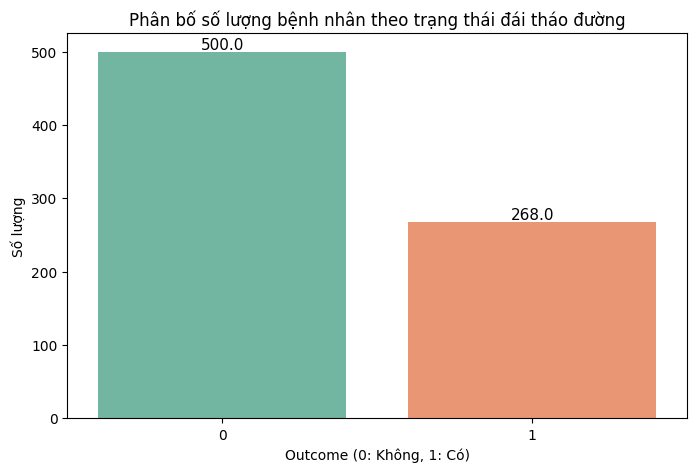

In [22]:
# Phân bố lớp
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=data_scaled, palette='Set2')
plt.title('Phân bố số lượng bệnh nhân theo trạng thái đái tháo đường')
# Hiển thị thêm con số trên cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    # giải thích: p.get_x() + p.get_width() / 2. là vị trí x ở giữa cột, p.get_height() là vị trí y trên đỉnh cột
plt.xlabel('Outcome (0: Không, 1: Có)')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét:** 
- Dữ liệu cho thấy 500 mẫu không đái tháo đường (0) và 268 mẫu có đái tháo đường (1), chiếm tỷ lệ khoảng 65% và 35%. Sự mất cân bằng này cần được xem xét khi xây dựng mô hình, phù hợp với phân bố được ghi nhận trong tài liệu.

#### 4.3.2 Phân bố các thuộc tính

Ý nghĩa của việc sử dụng biểu đồ Histogram + KDE để trực quan dữ liệu
- **Histogram (biểu đồ tần suất):**  
  - Cho thấy sự phân bố của dữ liệu theo từng biến (feature).  
  - Giúp ta hiểu được giá trị nào xuất hiện nhiều, giá trị nào ít, có bị lệch (skewness) hay không.  
  - Dễ dàng nhận ra các giá trị bất thường (outliers) hoặc dữ liệu thiếu (ví dụ: nhiều giá trị 0 ở `Insulin`, `SkinThickness`).  

- **KDE (đường mật độ):**  
  - Biểu diễn đường cong mật độ xác suất ước lượng từ histogram.  
  - Làm cho ta thấy rõ hơn **hình dạng phân phối** (chuẩn, lệch phải, lệch trái).  
  - Giúp so sánh mượt mà hơn giữa các nhóm.     

- **Sử dụng `hue='Outcome'`:**  
  - Cho phép **so sánh phân phối** giữa hai nhóm:  
    - `Outcome = 0`: không mắc tiểu đường.  
    - `Outcome = 1`: mắc tiểu đường.  
  - Giúp ta phát hiện biến nào có **khả năng phân biệt mạnh** (ví dụ: Glucose, BMI), và biến nào ít phân biệt (ví dụ: BloodPressure). 

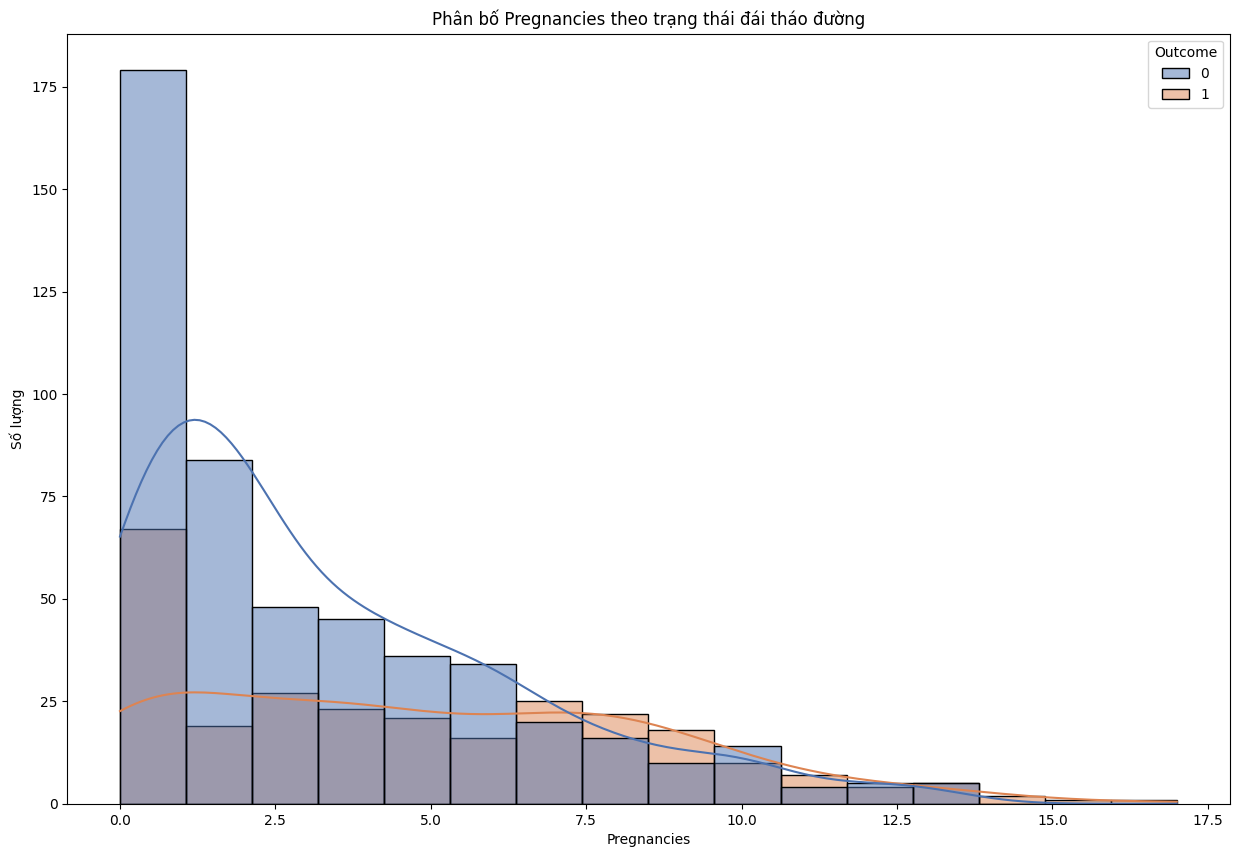

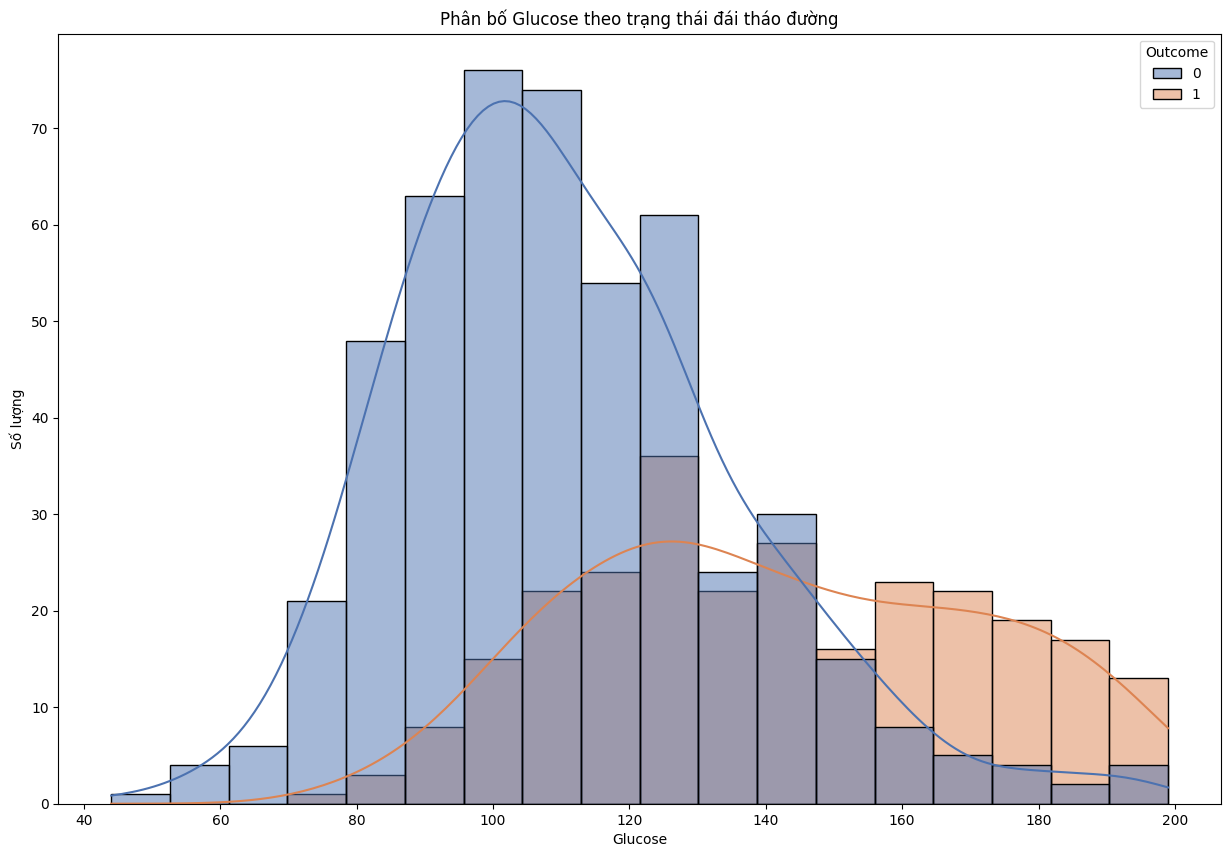

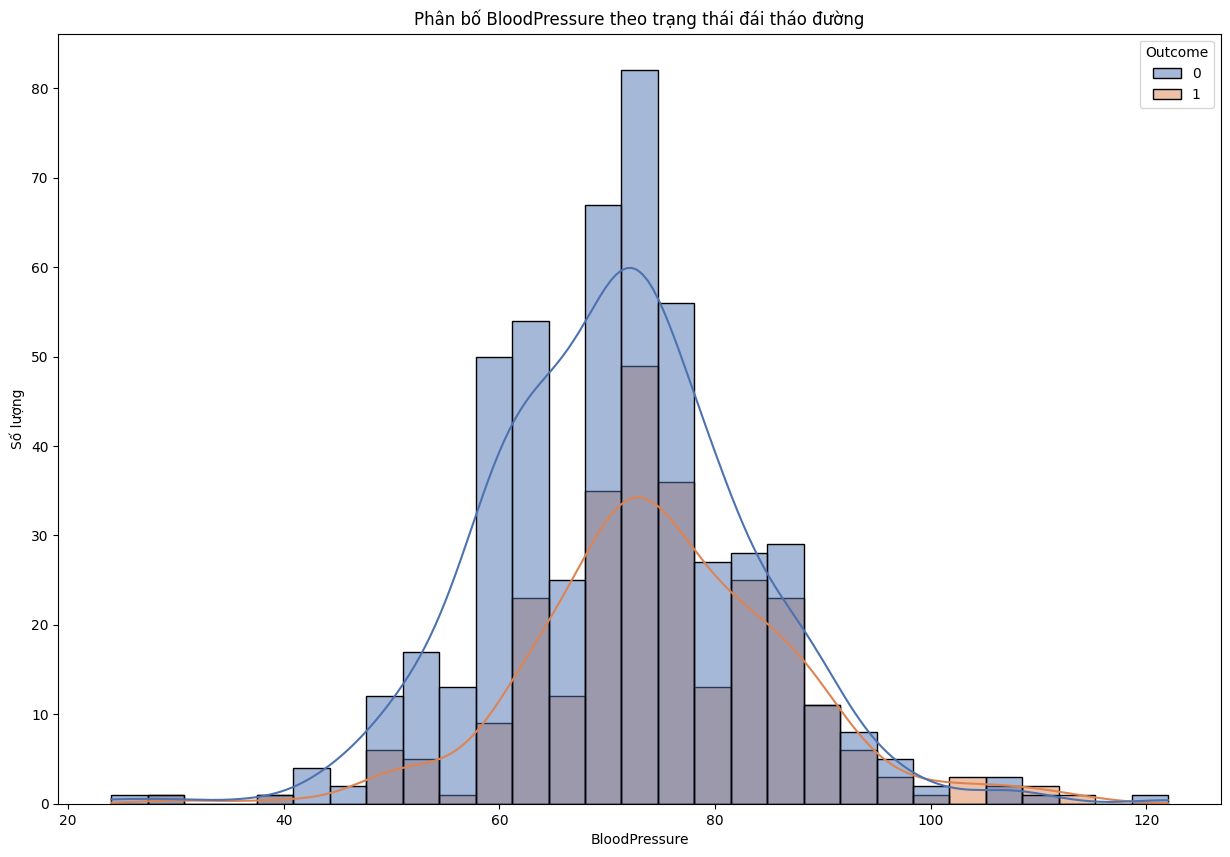

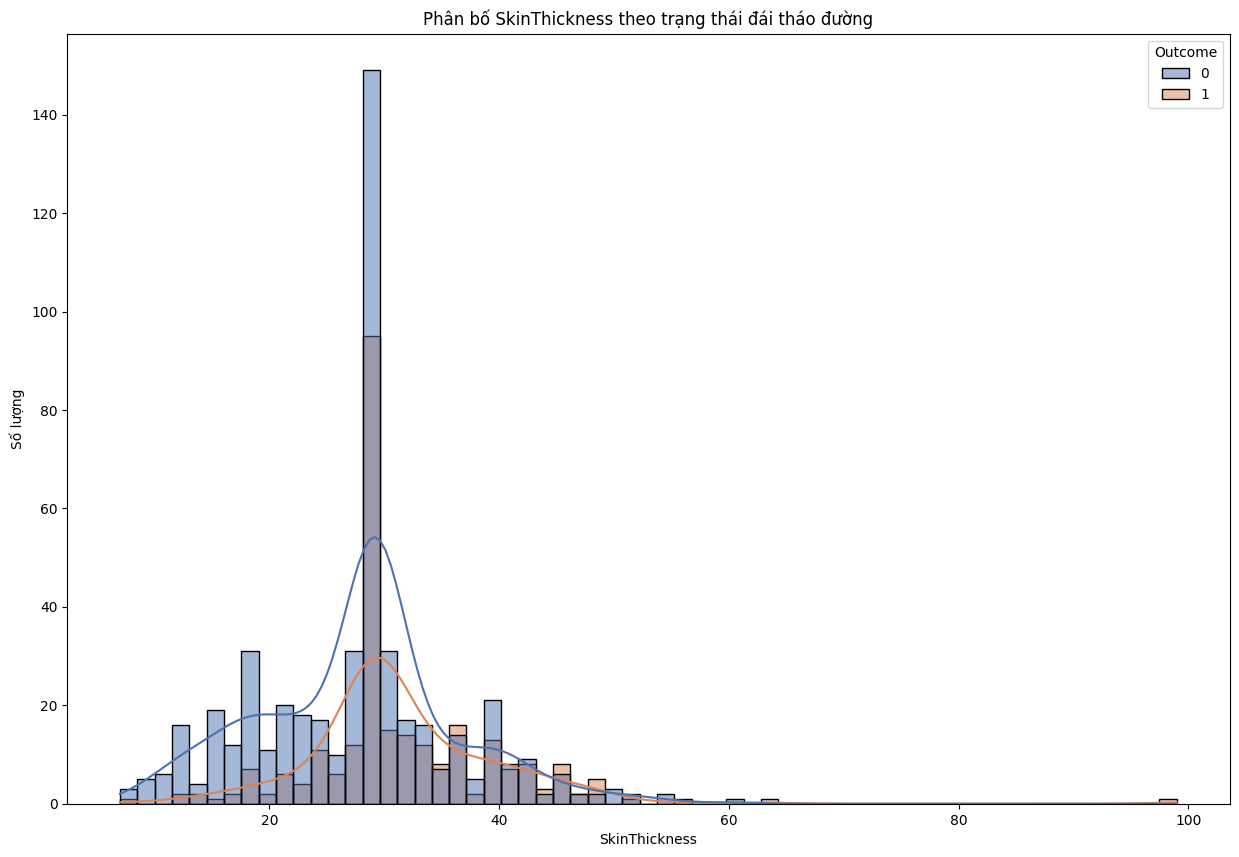

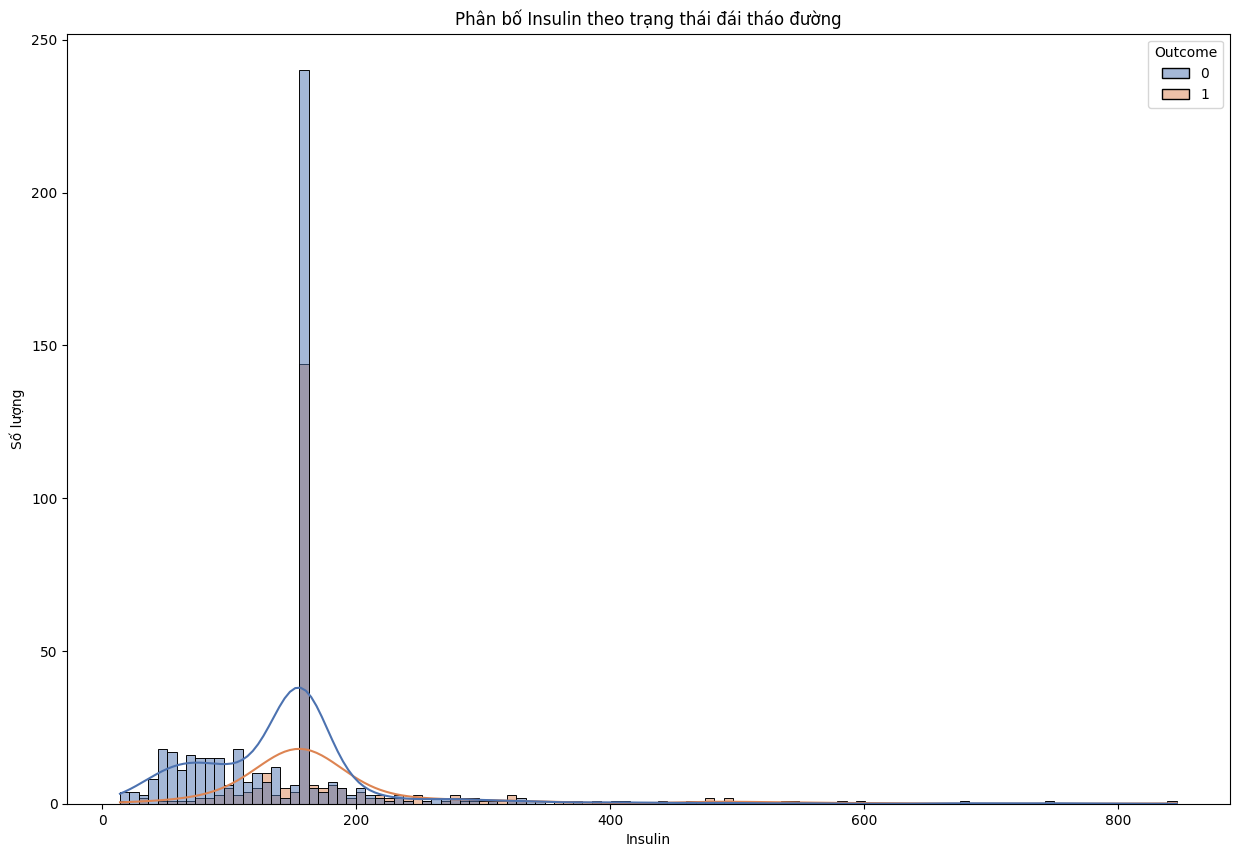

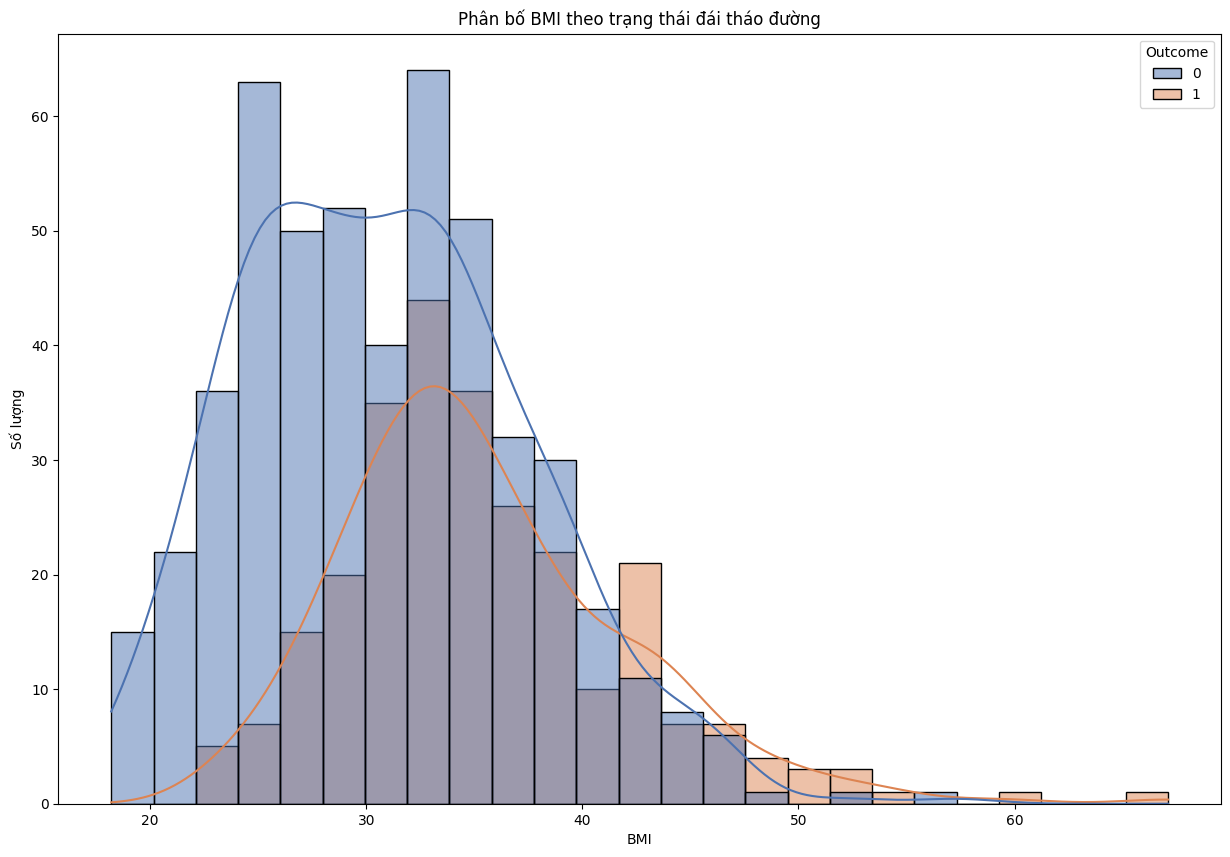

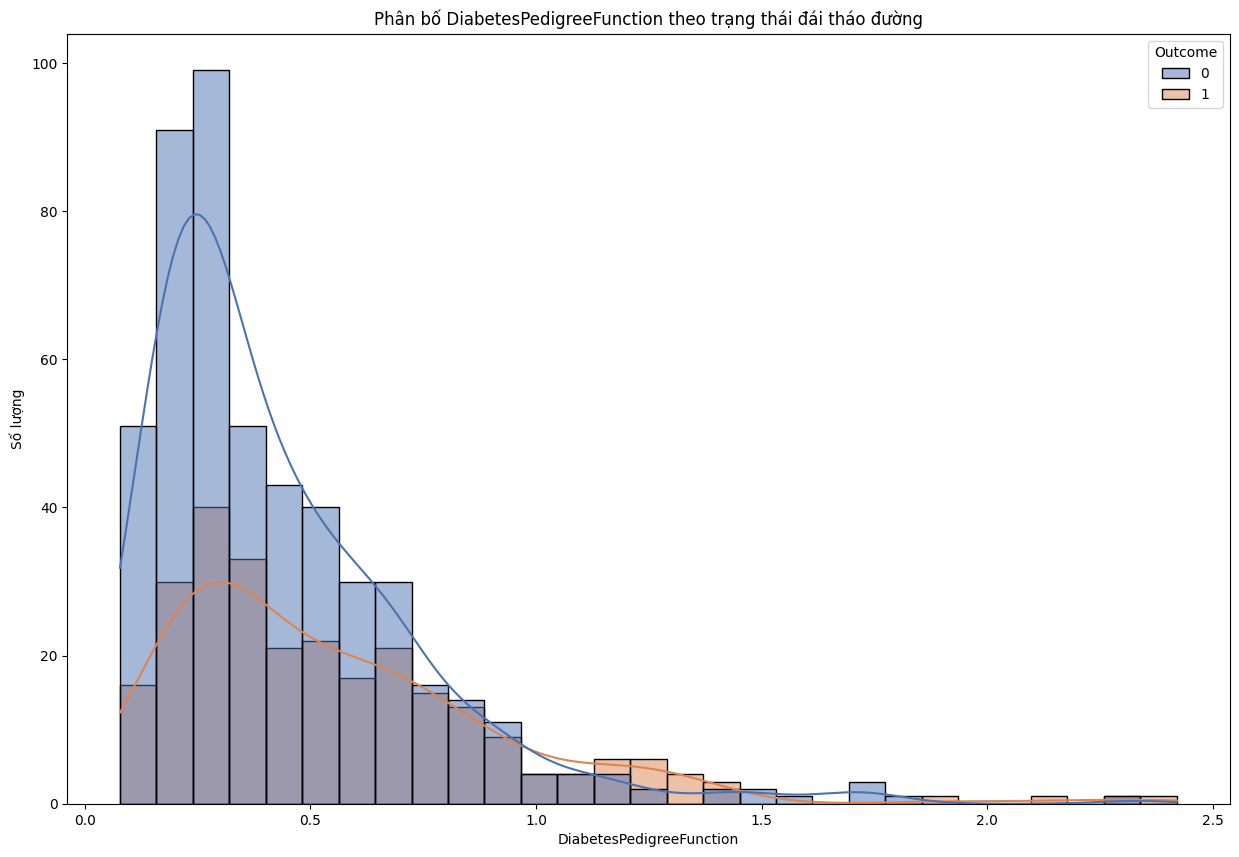

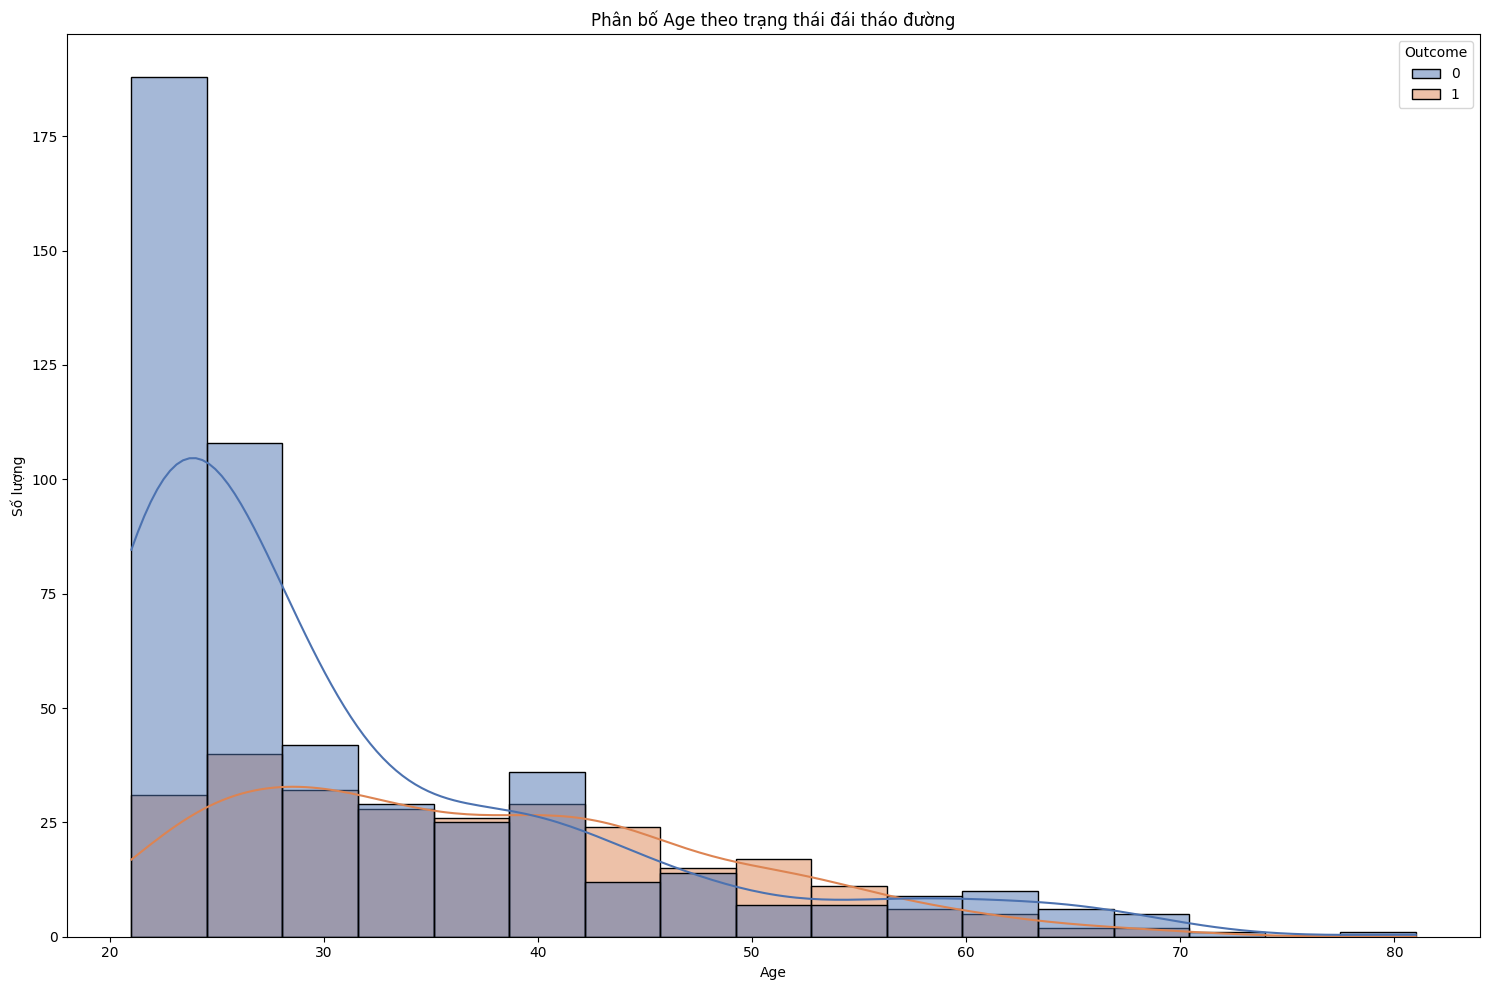

In [23]:
# Vẽ histogram cho tất cả các thuộc tính
for i, column in enumerate(data.columns[:-1], 1):  # Loại bỏ 'Outcome' khỏi histogram
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 1, 1)
    sns.histplot(data=data, x=column, hue='Outcome', kde=True, palette='deep')
    plt.title(f'Phân bố {column} theo trạng thái đái tháo đường')
    plt.xlabel(column)
    plt.ylabel('Số lượng')
    plt.savefig(f"{column}_histograms.png")
plt.tight_layout()
plt.show()

Biểu đồ này giúp:
1. **Hiểu cấu trúc dữ liệu** trước khi làm mô hình.  
2. **Xác định biến quan trọng** (feature importance trực quan).  
3. **Phát hiện dữ liệu bất thường hoặc thiếu**.  
4. Đưa ra định hướng cho **tiền xử lý dữ liệu** (xử lý outlier, missing values, chuẩn hóa). 

**Nhận xét:**
- Pregnancies (Số lần mang thai):
    - Phân bố lệch phải, với phần lớn giá trị từ 0-5. Nhóm Outcome = 1 có xu hướng tập trung ở số lần mang thai cao hơn (4-10), gợi ý rằng tiền sử sinh sản nhiều có thể làm tăng nguy cơ, phù hợp với nghiên cứu dịch tễ trong paper3.pdf.

- Glucose (Nồng độ glucose):
    - Đây là biến phân tách rõ ràng nhất:
    - Phân bố gần chuẩn, nhưng nhóm Outcome = 1 có đỉnh rõ ở mức >120 mg/dl, hỗ trợ tiêu chí chẩn đoán WHO (≥200 mg/dl, paper1.pdf).
    - Nhóm tiểu đường có giá trị glucose cao hơn hẳn nhóm không tiểu đường.
    -Đây là biến quan trọng nhất để phân loại.

- BloodPressure (Huyết áp tâm thu):
    -Phân bố tập trung quanh 70-80 mm Hg, không có sự khác biệt rõ rệt giữa hai nhóm, cho thấy huyết áp có thể không phải yếu tố quyết định trong dataset này.

- SkinThickness (Độ dày nếp gấp da):
    - Phân bố lệch phải, nhóm Outcome = 1 có xu hướng cao hơn (20-40 mm), phản ánh mối liên hệ với béo phì, như được đề cập trong paper3.pdf.

- Insulin (Insulin huyết thanh):
    - Phân bố rất lệch, với nhiều giá trị thấp. Nhóm Outcome = 1 có xu hướng cao hơn, nhưng dữ liệu thiếu nhiều (giá trị 0 ban đầu) có thể ảnh hưởng đến phân tích.

- BMI (Chỉ số khối cơ thể):
    - Phân bố tập trung quanh 30-40, với nhóm Outcome = 1 nghiêng về BMI >30 (béo phì), củng cố vai trò của béo phì trong đái tháo đường loại 2 (paper3.pdf).
    - Nhóm tiểu đường có xu hướng BMI cao hơn.
    - Đây là một yếu tố nguy cơ quan trọng.

- DiabetesPedigreeFunction (Hàm phả hệ):
    - Phân bố lệch phải, nhóm Outcome = 1 có giá trị cao hơn (0.4-1.0), cho thấy yếu tố di truyền quan trọng, như phân tích trong paper2.pdf.

- Age (Tuổi):
    - Người tiểu đường có xu hướng lớn tuổi hơn.
    - Yếu tố tuổi tác cũng góp phần tăng nguy cơ.
    - Phân bố lệch phải, nhóm Outcome = 1 tập trung ở tuổi >40, phù hợp với nghiên cứu về lão hóa và nguy cơ đái tháo đường (paper1.pdf).


### 4.4 Trực quan hóa mối quan hệ giữa các thuộc tính

#### 4.4.1 Ma trận tương quan

- **Ý nghĩa:**  
  - Ma trận tương quan cho thấy mối quan hệ tuyến tính giữa các cặp biến.  
  - Hệ số tương quan (Pearson):  
    - Gần **1** → tương quan thuận mạnh.  
    - Gần **-1** → tương quan nghịch mạnh.  
    - Gần **0** → ít hoặc không có quan hệ tuyến tính.  
  - Màu sắc trên heatmap:  
    - **Đỏ** = tương quan dương mạnh.  
    - **Xanh** = tương quan yếu hoặc âm.  

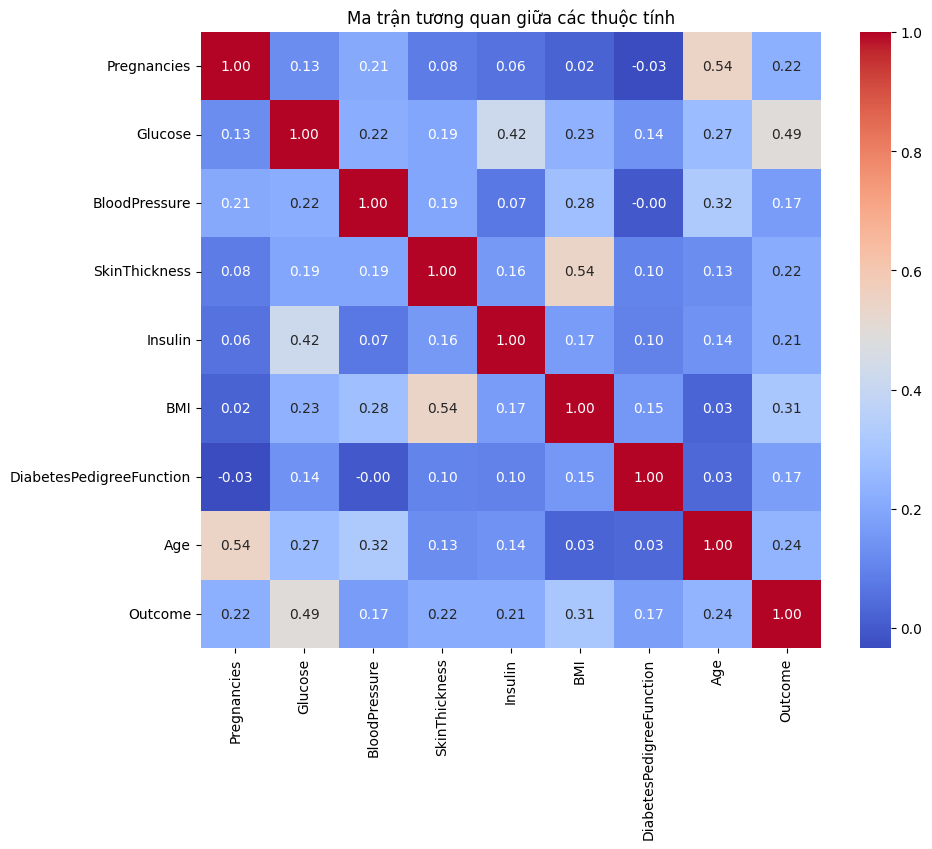

In [24]:
# Ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()

**Nhận xét:**

1. **Mối quan hệ với nhãn `Outcome`:**  
   - `Glucose` có tương quan cao nhất (0.49) → cho thấy nồng độ glucose cao là yếu tố dự báo quan trọng cho bệnh đái tháo đường, phù hợp với kiến thức y học.
   - `BMI` (0.31), `Age` (0.24), `Pregnancies` (0.22), `SkinThickness` (0.22) → có mối quan hệ dương nhưng yếu hơn. cho thấy béo phì, tuổi cao và yếu tố di truyền đều góp phần làm tăng nguy cơ mắc bệnh. 
   - `BloodPressure`, `Insulin`, `DiabetesPedigreeFunction` → tương quan rất thấp (< 0.21).

2. **Mối quan hệ giữa các biến độc lập:**  
   - `SkinThickness` ↔ `BMI` (0.54) → hợp lý, do mỡ dưới da thường liên quan đến BMI.  
   - `Pregnancies` ↔ `Age` (0.54) → càng lớn tuổi thì số lần mang thai càng nhiều.  
   - `Glucose` ↔ `Insulin` (0.42) → đường huyết cao thường đi kèm insulin cao.    

3. **Đánh giá cho mô hình học máy:**  
    - Không có cặp biến nào tương quan quá cao (>0.8) → ít nguy cơ đa cộng tuyến.  
    - Các biến khác nhau đóng góp bổ sung thông tin.  
    - Không có cặp thuộc tính nào có tương quan tuyệt đối (gần 1 hoặc -1), do đó dữ liệu phù hợp cho các mô hình học máy mà không lo trùng lặp thông tin.

#### 4.4.2 Hiển thị nhiều tính chất

- ***Phân tích biểu đồ Pairplot***
- Pairplot là một công cụ trực quan hóa mạnh mẽ để hiển thị mối quan hệ giữa tất cả các cặp biến trong dataset. Biểu đồ này tạo ra một ma trận các scatter plot (biểu đồ phân tán) và histogram.
**Cấu trúc biểu đồ:**
- Đường chéo chính: Histogram phân phối của từng biến
- Các ô ngoài đường chéo: Scatter plot giữa hai biến
- Màu sắc: Phân biệt theo nhóm (Outcome: 0 = không đái tháo đường, 1 = có đái tháo đường)
**Mục đích:**
Biểu đồ pairplot này cung cấp một cái nhìn toàn diện về mối quan hệ giữa các yếu tố nguy cơ và tình trạng đái tháo đường. 

<Figure size 1200x1000 with 0 Axes>

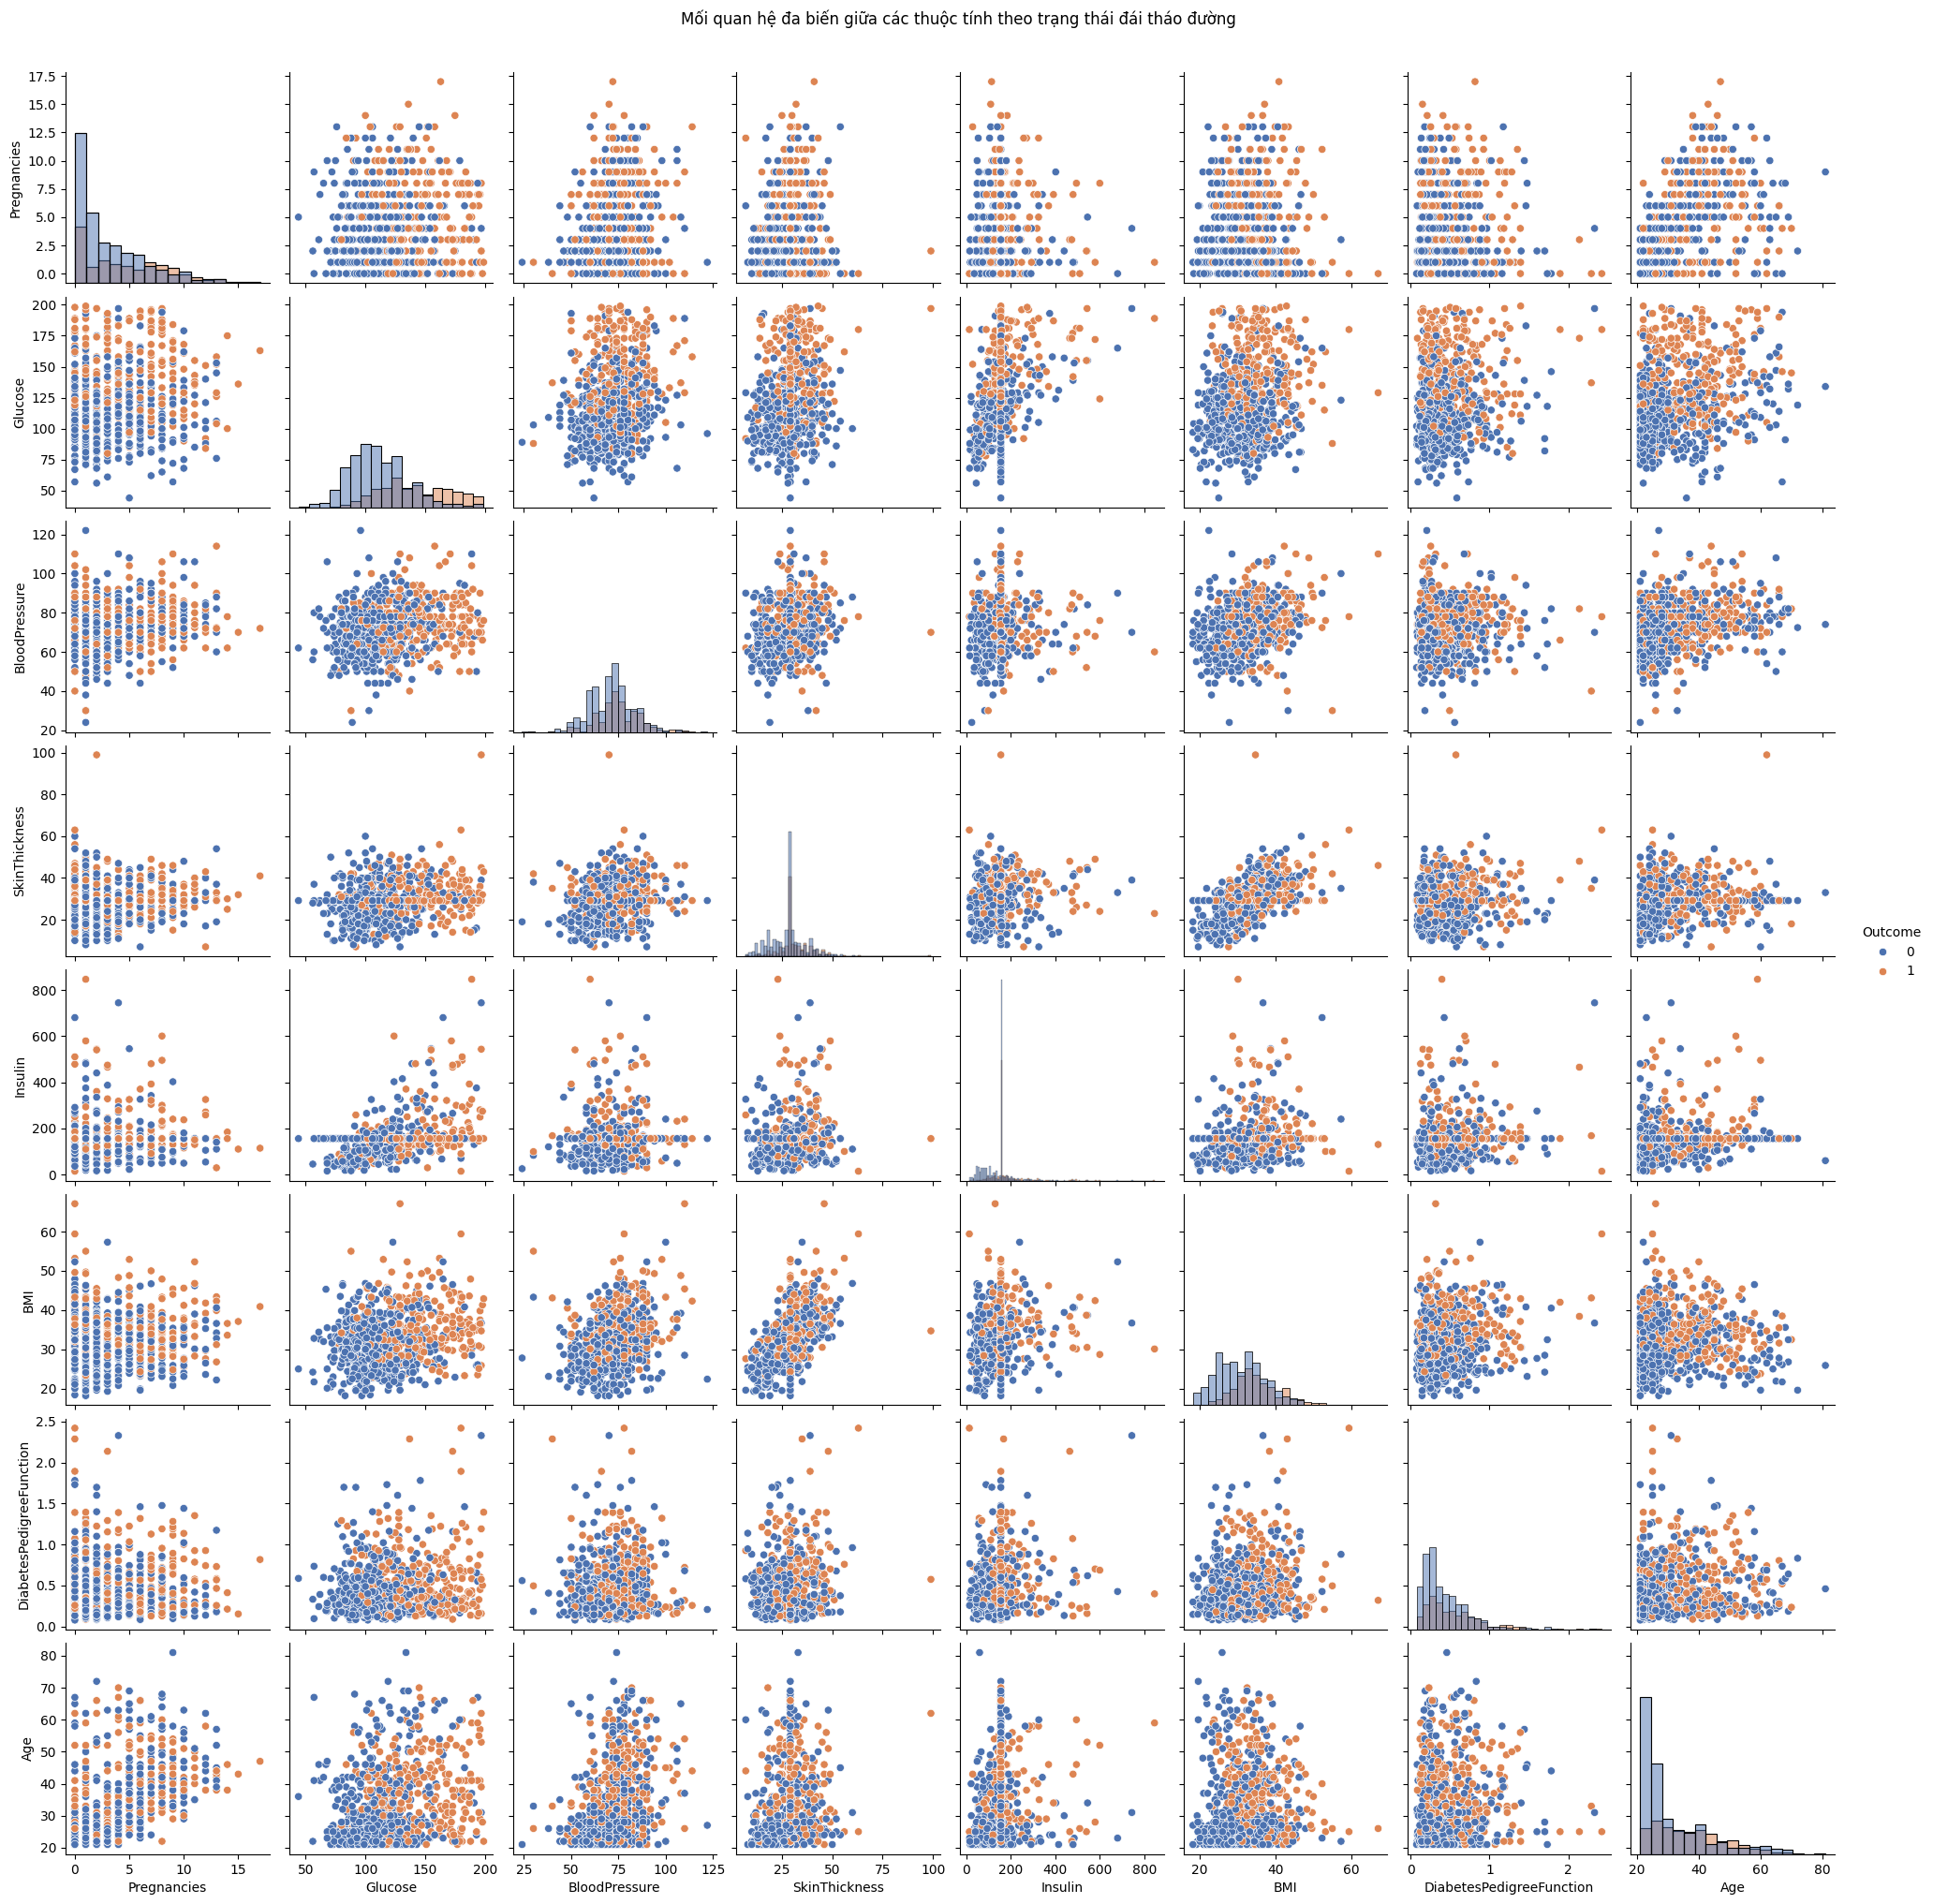

In [25]:
# Vẽ pairplot để phân tích mối quan hệ đa biến
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='Outcome', palette='deep', diag_kind='hist')
plt.suptitle('Mối quan hệ đa biến giữa các thuộc tính theo trạng thái đái tháo đường', y=1.02)
plt.show()

**Nhận xét:**

1. Glucose (Đường huyết)
    Quan sát: Có sự phân tách rõ ràng giữa 2 nhóm
    Ý nghĩa: Những người có glucose cao (>120-140 mg/dL) có xu hướng mắc đái tháo đường
    Kết luận: Glucose là yếu tố dự đoán mạnh nhất

2. BMI (Chỉ số khối cơ thể)
    Quan sát: Nhóm bị đái tháo đường có BMI cao hơn
    Ý nghĩa: Thể trọng tăng là yếu tố nguy cơ quan trọng
    Kết luận: BMI > 30 tăng nguy cơ đáng kể

3. Age (Tuổi)
    Quan sát: Tần suất bệnh tăng theo tuổi
    Ý nghĩa: Tuổi tác là yếu tố nguy cơ tự nhiên
    Kết luận: Người trên 40 tuổi có nguy cơ cao hơn

4. Pregnancies (Số lần mang thai)
    Quan sát: Có mối liên hệ với bệnh ở phụ nữ
    Ý nghĩa: Đái tháo đường thai kỳ có thể dẫn đến đái tháo đường type 2
    Kết luận: Nhiều lần mang thai tăng nguy cơ

5. DiabetesPedigreeFunction (Yếu tố di truyền)
    Quan sát: Phân bố khác biệt giữa 2 nhóm
    Ý nghĩa: Tiền sử gia đình ảnh hưởng đến nguy cơ
    Kết luận: Di truyền là yếu tố quan trọng

**Mối quan hệ giữa các biến:**
- Tương quan tích cực mạnh:
Glucose - Outcome: Mối liên hệ mạnh nhất
BMI - SkinThickness: Thể hiện tình trạng béo phì
Age - Pregnancies: Tự nhiên theo thời gian

- Tương quan yếu hoặc không đáng kể:
BloodPressure: Không phân biệt rõ ràng giữa 2 nhóm
SkinThickness: Có xu hướng nhưng không mạnh
Insulin: Phân tán nhiều, khó phân biệt

**Ý nghĩa lâm sàng:**
- Chẩn đoán và sàng lọc:
Glucose là chỉ số quan trọng nhất để chẩn đoán
BMI giúp đánh giá nguy cơ
Age và Pregnancies là yếu tố nguy cơ bổ sung

- Dự phòng:
Kiểm soát cân nặng (BMI)
Theo dõi đường huyết định kỳ
Chú ý đặc biệt với phụ nữ có nhiều lần mang thai
Tầm soát sớm ở người có tiền sử gia đình

***Kết luận tổng thể:***
Biểu đồ pairplot cho thấy Glucose, BMI, và Age là ba yếu tố quan trọng nhất trong việc dự đoán đái tháo đường. Sự kết hợp của nhiều yếu tố sẽ cho độ chính xác cao hơn so với chỉ dựa vào một yếu tố đơn lẻ. Điều này hỗ trợ việc phát triển các mô hình machine learning để dự đoán và chẩn đoán bệnh đái tháo đường.

#### 4.4.3 Biểu đồ scatter giữa Glucose và BMI (tiêu biểu)

***Phân tích biểu đồ Scatter***
**Ý nghĩa của biểu đồ Scatter Plot**
- Scatter plot (biểu đồ phân tán) hiển thị mối quan hệ giữa hai biến liên tục - trong trường hợp này là Glucose (đường huyết) và BMI (chỉ số khối cơ thể). Màu sắc phân biệt giữa hai nhóm:
    - Màu xanh (0): Không bị đái tháo đường
    - Màu cam (1): Bị đái tháo đường

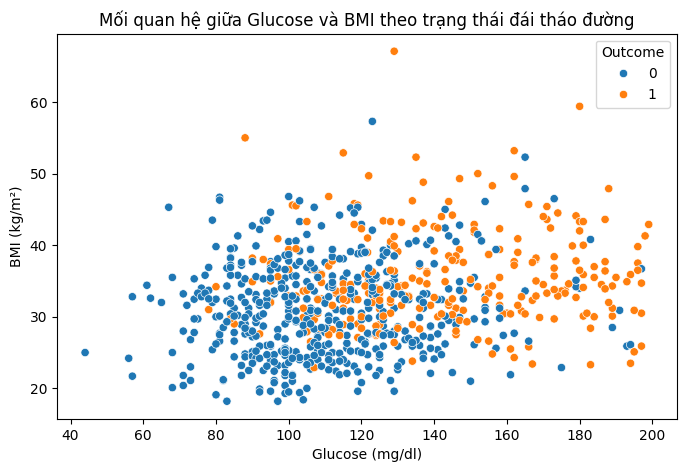

In [26]:
# Biểu đồ scatter giữa Glucose và BMI
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data)
plt.title('Mối quan hệ giữa Glucose và BMI theo trạng thái đái tháo đường')
plt.xlabel('Glucose (mg/dl)')
plt.ylabel('BMI (kg/m²)')
plt.show()

**Phân tích chi tiết các vùng trên biểu đồ**
- Vùng 1: Glucose thấp (< 100 mg/dl) - BMI thấp (< 25)
    Đặc điểm: Chủ yếu là điểm màu xanh (không bị bệnh)
    Ý nghĩa: Vùng "an toàn" - ít nguy cơ đái tháo đường nhất
    Khuyến nghị: Duy trì lối sống lành mạnh để giữ ở mức này

- Vùng 2: Glucose cao (> 126 mg/dl) - BMI cao (> 30)
    Đặc điểm: Tập trung nhiều điểm màu cam (bị bệnh)
    Ý nghĩa: Vùng "nguy hiểm" - nguy cơ cao nhất
    Khuyến nghị: Cần can thiệp y tế tích cực, kiểm soát cả đường huyết và cân nặng

- Vùng 3: Glucose trung bình (100-126 mg/dl) - BMI trung bình (25-30)
    Đặc điểm: Hỗn hợp cả hai màu, nhưng có xu hướng tăng màu cam
    Ý nghĩa: Vùng "cảnh báo" - tiền đái tháo đường
    Khuyến nghị: Theo dõi sát, thay đổi lối sống để phòng ngừa

### 4.5 Thuật toán học ADAP để dự đoán sự khởi phát của bệnh đái tháo đường

#### 4.5.1 Bối cảnh và Tầm Quan trọng

- Dữ liệu nghiên cứu: Nghiên cứu sử dụng dữ liệu từ dân số Pima Indian, được theo dõi từ năm 1965 bởi National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). Dân số này có tỷ lệ đái tháo đường cao, đặc biệt là loại không phụ thuộc insulin (NIDDM), do yếu tố di truyền và lối sống.
- Thách thức: Các phương pháp thống kê truyền thống thường thất bại khi dữ liệu có mẫu nhỏ, mối quan hệ hàm phức tạp, hoặc tương tác đa biến không rõ ràng. ADAP nổi bật nhờ khả năng học từ dữ liệu và điều chỉnh dự đoán dựa trên sai số.
- Mục tiêu: Dự đoán sự khởi phát đái tháo đường trong 5 năm dựa trên 8 biến số (số lần mang thai, nồng độ glucose huyết tương, huyết áp, độ dày nếp gấp da, insulin huyết thanh, chỉ số khối cơ thể, hàm số pedigree đái tháo đường, và tuổi).

#### 4.5.2 ADAP là gì?

- ADAP là một thuật toán học thích nghi, mô phỏng các thiết bị giống perceptron, được thiết kế để tạo ra các mô hình "phân vùng" đặc biệt cho từng vấn đề cụ thể. Nó học bằng cách điều chỉnh nội bộ khi dự đoán sai, dựa trên sai số giữa giá trị dự đoán và giá trị thực tế.
- Quy trình hoạt động:

    - Đào tạo: Sử dụng 576 trường hợp để ADAP học mẫu từ 8 biến số.
    - Dự đoán: Áp dụng trên 192 trường hợp kiểm tra để dự đoán nguy cơ đái tháo đường trong 5 năm.
    - Điều chỉnh: So sánh kết quả dự đoán với thực tế, điều chỉnh nội bộ để cải thiện độ chính xác.

- Đặc điểm nổi bật: ADAP không yêu cầu giả định về mối quan hệ hàm (khác với hồi quy), phù hợp với dữ liệu y tế phức tạp.

#### 4.5.3 Dữ liệu và Biến số Nhập vào: *đã miêu tả ở phần 1 gồm 8 thuộc tính*

- Hàm số DPF được định nghĩa:
$ DPF = \frac{\sum v_i (88 - ADM_i) + 20}{\sum K_j (ACL_j - 14) + 50} $

- Số lượng người thân mắc tiểu đường
    - i bao gồm tất cả những người thân đã mắc bệnh tiểu đường tính đến ngày khám của đối tượng;
    - j bao gồm tất cả những người thân KHÔNG mắc
- Tuổi mắc bệnh của họ
    - ADMi  là độ tuổi tính theo năm của người thân khi bệnh tiểu đường được chẩn đoán;
    - ACLj  là độ tuổi tính theo năm của người thân tại lần khám không mắc bệnh tiểu đường gần nhất (trước ngày khám của đối tượng);
- K là tỷ lệ phần trăm gen được chia sẻ bởi người thân (relativex)


#### 4.5.4 Kết quả và Đánh giá

- Hiệu suất: ADAP đạt độ nhạy (sensitivity) và độ đặc hiệu (specificity) 76% trên 192 trường hợp kiểm tra, với điểm cắt (cutoff) 0.448. Điều này có nghĩa là thuật toán dự đoán đúng 76% trường hợp mắc và không mắc bệnh.
- Đường cong ROC: Được sử dụng để đánh giá hiệu quả phân loại, cho thấy ADAP có khả năng phân biệt tốt giữa các nhóm.
- So sánh: Nghiên cứu đang so sánh ADAP với hồi quy logistic và perceptron tuyến tính để kiểm tra độ ưu việt.

#### 4.5.5 Ứng dụng Thực tế

- Y tế dự phòng: ADAP có thể được tích hợp vào hệ thống y tế để sàng lọc sớm nguy cơ đái tháo đường, đặc biệt ở các cộng đồng có nguy cơ cao.
- Cá nhân hóa: Dựa trên dữ liệu cá nhân (8 biến số), bác sĩ có thể đưa ra kế hoạch can thiệp (chế độ ăn, tập luyện) trước khi bệnh phát triển.
- Nghiên cứu thêm: Kết hợp ADAP với dữ liệu di truyền hiện đại (genomics) để nâng cao độ chính xác.

#### 4.5.6 Ưu điểm và Hạn chế

**Ưu điểm:**

- Linh hoạt với dữ liệu phức tạp.
- Không yêu cầu giả định thống kê nghiêm ngặt.
- Tiềm năng cải thiện với dữ liệu lớn hơn.

**Hạn chế:**

- Yêu cầu dữ liệu chất lượng cao để đào tạo.
- Hiệu suất 76% vẫn chưa tối ưu, cần cải tiến.
- Chưa được kiểm chứng rộng rãi ngoài dân số Pima.

### 4.6 Mô phỏng và trực quan hóa
**Mô hình:**
- Sử dụng mô hình Logistic Regression để tính và vẽ đường cong ROC, cũng như tính sensitivity và specificity với ngưỡng cắt 0.448 – một thông số được đề cập trong nghiên cứu ADAP.

**Mục tiêu:**
- Mục tiêu là mô phỏng và so sánh hiệu suất dự đoán với kết quả mà ADAP đã đạt được (76% sensitivity và specificity trên 192 mẫu kiểm tra).

**Ý nghĩa:**
- Là một cách để tái hiện và kiểm tra các phương pháp đánh giá từ ADAP, nhưng nó không phải là đánh giá trực tiếp mô hình ADAP.

Chia dữ liệu và huấn luyện mô hình cơ bản
 Giới thiệu `train_test_split` và `LogisticRegression`
 - **`train_test_split` (từ sklearn.model_selection)**  
  - Dùng để **chia dữ liệu** thành 2 (hoặc nhiều) tập:  
    - **Training set**: dùng để huấn luyện mô hình.  
    - **Testing set**: dùng để đánh giá hiệu suất mô hình trên dữ liệu chưa từng thấy.  
  - Giúp kiểm tra khả năng **tổng quát hóa (generalization)** của mô hình, tránh overfitting.  
  - Thông số thường dùng:  
    - `test_size=0.2`: 20% dữ liệu làm tập test.  
    - `random_state=42`: đảm bảo kết quả chia cố định (tái lặp được).  


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = data_scaled.drop('Outcome', axis=1) # Các biến đầu vào (8 biến)
y = data_scaled['Outcome'] # Biến mục tiêu (Outcome)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Chia 75% huấn luyện, 25% kiểm tra

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000) # Tăng max_iter để đảm bảo hội tụ
model.fit(X_train, y_train) # Huấn luyện mô hình

# Dự đoán xác suất
y_prob = model.predict_proba(X_test)[:, 1] # Lấy xác suất của lớp 1 (có đái tháo đường)


**Giải thích:**
- Sử dụng Logistic Regression để mô phỏng, tương tự như cách ADAP tạo giá trị thực từ 0 đến 1, với ngưỡng cắt 0.448 như trong nghiên cứu.

Tính và vẽ đường cong ROC
***Giới thiệu về ROC Curve và AUC***
**ROC Curve (Receiver Operating Characteristic)**
- ROC Curve là một công cụ đánh giá hiệu suất quan trọng trong machine learning, đặc biệt cho các bài toán phân loại nhị phân (binary classification). Đường cong này thể hiện mối quan hệ giữa:
    - Trục Y (True Positive Rate - TPR): Độ nhạy (Sensitivity) = TP / (TP + FN)
    - Trục X (False Positive Rate - FPR): 1 - Độ đặc hiệu (Specificity) = FP / (FP + TN)

**AUC (Area Under the Curve)**
- AUC là diện tích dưới đường cong ROC, có giá trị từ 0 đến 1:
    - AUC = 1.0: Mô hình hoàn hảo
    - AUC = 0.5: Mô hình ngẫu nhiên (không có khả năng phân biệt)
    - AUC < 0.5: Mô hình tệ hơn dự đoán ngẫu nhiên

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

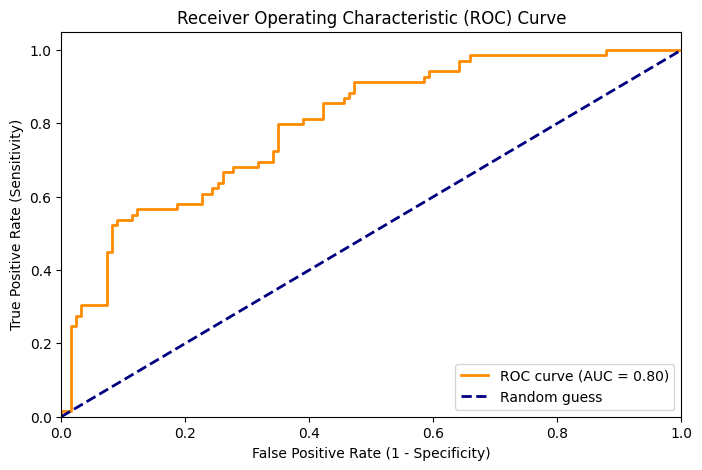

In [30]:
# Tính ROC curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Phân tích kết quả từ biểu đồ (AUC = 0.80)**
Đánh giá chất lượng mô hình:
- Điểm mạnh:
    - AUC = 0.80: Mô hình có hiệu suất tốt (Good performance)
    - Đường cong cong lên phía trên: Cho thấy mô hình tốt hơn dự đoán ngẫu nhiên
    - Tăng nhanh ở đầu: TPR tăng nhanh khi FPR còn thấp

**Ứng dụng trong chẩn đoán đái tháo đường**
- Lợi ích của AUC = 0.80:
    - Sàng lọc cộng đồng:
    - Có thể phát hiện 80% ca bệnh với tỷ lệ dương tính giả chấp nhận được
    - Giảm tải cho hệ thống y tế

- Hỗ trợ bác sĩ:
    - Cung cấp thông tin bổ sung cho quyết định lâm sàng
    - Không thay thế nhưng hỗ trợ chẩn đoán

- Theo dõi nguy cơ:
    - Phân tầng bệnh nhân theo mức độ nguy cơ
    - Lên kế hoạch can thiệp sớm

# Kết thúc